In [71]:
import pandas as pd
import nltk
from nltk.corpus import stopwords  
from nltk.stem.wordnet import WordNetLemmatizer 
import string

In [73]:
f = open("abstract.txt", "r")
doc=f.read()

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer to extract keywords
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')

# Fit and transform the 'Content' column
X = vectorizer.fit_transform([doc])

# Get the top 10 keywords
keywords = vectorizer.get_feature_names_out()

# Display the top keywords
print("Top Keywords:", keywords)

Top Keywords: ['ai' 'algorithms' 'clinical' 'data' 'genetic' 'human' 'learning'
 'physics' 'variant' 'variants']


In [77]:
from sklearn.decomposition import LatentDirichletAllocation

# Create a TfidfVectorizer and transform the content
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform([doc])

# Perform LDA (Topic Modeling)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display the topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(", ".join(top_words))


Topic #0:
physics, ai, algorithms, genetic, data, variant, clinical, variants, learning, deep
Topic #1:
ai, physics, algorithms, genetic, data, variant, clinical, variants, learning, deep
Topic #2:
physics, ai, algorithms, genetic, data, variant, clinical, variants, learning, deep


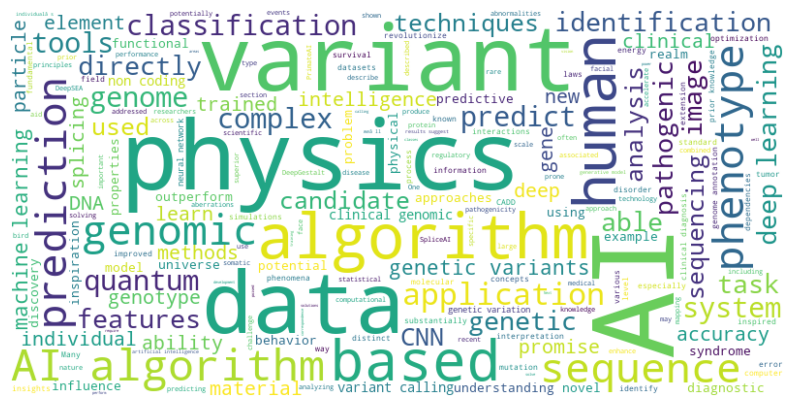

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud from the content of the posts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([doc]))

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()